<a href="https://colab.research.google.com/github/Syed-Irfan-1165/ML-Classification/blob/master/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cardiovascular Risk Prediction 

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

**Project Type** - Machine Learning Classification
**:**
*  **Member 1** - Syed Khaja Irfanuddin


#Project Summary

The project on cardiovascular risk prediction aims to develop a model that can accurately predict the likelihood of an individual developing cardiovascular disease (CVD) based on demographic and lifestyle factors. The goal is to provide a personalized risk score for each individual, allowing healthcare providers to intervene and prevent or mitigate the disease.

The model will take into account factors such as age, gender, family history, smoking, hypertension, obesity, physical inactivity, high cholesterol levels, and diabetes. The project will address the challenge of accurately quantifying the contribution of each factor to the overall CVD risk and taking into account the complex interplay between these factors. The solution will be scalable, easily interpretable, and able to handle missing data.

The end result of this project will be a predictive model that can be used by healthcare providers to prioritize their interventions and improve the outcomes for individuals at high risk of CVD. The model will have the potential to have a significant impact on public health by reducing the incidence of CVD and improving the lives of those affected by the disease.

##Dataset description

### Demographic:
*  Sex: male or female("M" or "F")
*  Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

### Behavioral:
*  is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
*  Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

### Medical( history):
*  BP Meds: whether or not the patient was on blood pressure medication (Nominal)
*  Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
*  Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
*  Diabetes: whether or not the patient had diabetes (Nominal)

### Medical( current):
*  Tot Chol: total cholesterol level (Continuous)
*  Sys BP: systolic blood pressure (Continuous)
*  Dia BP: diastolic blood pressure (Continuous)
*  BMI: Body Mass Index (Continuous)
*  Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though infact discrete, yet are considered continuous because of large number of possible values.)
*  Glucose: glucose level (Continuous)

### Predict variable (desired target):
*  10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) 

##Problem Statement

The problem of cardiovascular disease (CVD) prediction involves identifying individuals who are at a higher risk of developing CVD based on various demographic and lifestyle factors. The goal is to accurately assess the likelihood of an individual developing CVD in the near future, allowing healthcare providers to intervene and prevent or mitigate the disease.

#Know Your Data

In [3]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

Imported all the required library to perform our data analysis.\
Lets Import our dataset

In [4]:
#Mount Drive

from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [5]:
#Load Dataset

cv_df = pd.read_csv(r"/content/drive/MyDrive/Classification /data_cardiovascular_risk.csv")

##Understanding the data

###Dataset first view

In [6]:
cv_df.head().T

,0,1,2,3,4
id,0,1,2,3,4
age,64,36,46,50,64
education,2.0,4.0,1.0,1.0,1.0
sex,F,M,F,M,F
is_smoking,YES,NO,YES,YES,YES
cigsPerDay,3.0,0.0,10.0,20.0,30.0
BPMeds,0.0,0.0,0.0,0.0,0.0
prevalentStroke,0,0,0,0,0
prevalentHyp,0,1,0,1,0
diabetes,0,0,0,0,0


As we can see, our dataset contains both numerical and categorical columns.\
i.e.
1. Categorical (Ordinal and Nominal) 
2. Numerical (Continous and Discreet)

In [7]:
cv_df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count

cv_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [9]:
cv_df.shape

(3390, 17)

The datset contains of total 3390 rows and 17 columns.

### Dataset Information

In [10]:
cv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count

cv_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3390.0,1694.500000,978.753033,0.00,847.25,1694.50,2541.75,3389.0
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0


In [12]:
cv_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,3390.0,NaN,NaN,NaN,1694.5,978.753033,0.0,847.25,1694.5,2541.75,3389.0
age,3390.0,NaN,NaN,NaN,49.542183,8.592878,32.0,42.0,49.0,56.0,70.0
education,3303.0,NaN,NaN,NaN,1.970936,1.019081,1.0,1.0,2.0,3.0,4.0
sex,3390,2,F,1923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_smoking,3390,2,NO,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cigsPerDay,3368.0,NaN,NaN,NaN,9.069477,11.879078,0.0,0.0,0.0,20.0,70.0
BPMeds,3346.0,NaN,NaN,NaN,0.029886,0.170299,0.0,0.0,0.0,0.0,1.0
prevalentStroke,3390.0,NaN,NaN,NaN,0.00649,0.080309,0.0,0.0,0.0,0.0,1.0
prevalentHyp,3390.0,NaN,NaN,NaN,0.315339,0.464719,0.0,0.0,0.0,1.0,1.0
diabetes,3390.0,NaN,NaN,NaN,0.025664,0.158153,0.0,0.0,0.0,0.0,1.0


In [13]:
#writing a define funtion to extract the count,unique and missing values and creating  a seperate dataframe

def show_missing(df):
    
    count = []
    unique = []
    missing = []
    
    for item in df.columns: 
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        
        

    output = pd.DataFrame({
        
        'count': count,
        'unique': unique,
        'missing': missing,
        
    })    
        
    return output

In [14]:
show_missing(cv_df)

,count,unique,missing
0,3390,3390,0
1,3390,39,0
2,3390,5,87
3,3390,2,0
4,3390,2,0
5,3390,33,22
6,3390,3,44
7,3390,2,0
8,3390,2,0
9,3390,2,0


Now, we can see that how many how many unique values are present in categorical variables and numerical variables.

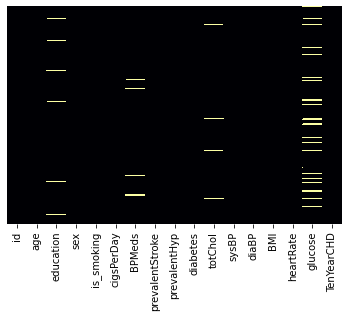

In [15]:
sns.heatmap(cv_df.isnull(),yticklabels=False,cbar=False,cmap='inferno')

In [16]:
missing = cv_df.columns[cv_df.isnull().any()].tolist()
print(round(cv_df[missing].isnull().sum().sort_values(ascending = False)/len(cv_df)*100,2))

glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


1. From the above heatmap we can see that the column education,BPMeds,toChol contains few missing values wheras the column glucose contains approx 9% of missing data.
2. We will be using median to replace the missing values.

In [17]:
# Replacing null values with the median
for col in ['glucose','education','BPMeds','totChol','cigsPerDay','BMI','heartRate']:
  cv_df[col] = cv_df[col].fillna(cv_df[col].median())

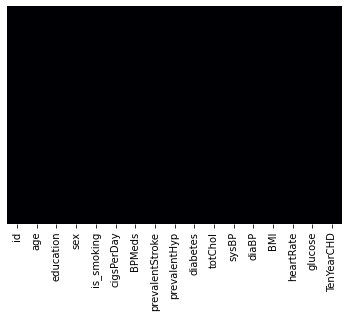

In [18]:
sns.heatmap(cv_df.isnull(),yticklabels=False,cbar=False,cmap='inferno')

 The data is filled with median values. So for further study, we are defining two lists as categorical and numerical variables.


In [147]:
#seperating our Categorical and Numerical data

Categorical_f1 = ['education','cigsPerDay', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
Numerical_f2 =  ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [148]:
print(Categorical_f1)
print(Numerical_f2)

['education', 'cigsPerDay', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


In [149]:
print(cv_df['TenYearCHD'].value_counts().reset_index(),"\n")

   index  TenYearCHD
0      0        2879
1      1         511 



Here TenYearCHD is the dependent variable and we can observe that only 16% (511/3390) of the total dataset is in **'1' or 'Yes'** class, remaining 2879/3390 are in **'0' or 'No'** class it is clear that our data is **Imbalanced**. We may face some difficulty in building model regarding this.

#**EDA**

##**Univariate Analysis**

###Data analysis with a **Donut Chart**

In [ ]:
import plotly.express as px

fig = px.pie(cv_df['TenYearCHD'].value_counts(), values='TenYearCHD', names='TenYearCHD', title='Cardiovascular Risk rate', labels='TenYearCHD')

fig = fig.update_traces(textposition='inside', textinfo='percent+label',textfont_size=16)

fig.show()

fig = px.pie(cv_df['BPMeds'].value_counts(), values='BPMeds', names='BPMeds', title='Blood pressure rate of people', labels='BPMeds')

fig = fig.update_traces(textposition='outside', textinfo='percent+label',textfont_size=16)

fig.show()

fig = px.pie(cv_df['prevalentStroke'].value_counts(), values='prevalentStroke', names='prevalentStroke', title='% people who had Stroke previously', labels='prevalentStroke')

fig = fig.update_traces(textposition='outside', textinfo='percent+label',textfont_size=16)

fig.show()

fig = px.pie(cv_df['prevalentHyp'].value_counts(), values='prevalentHyp', names='prevalentHyp', title='% people who had hypertension previously', labels='prevalentHyp')

fig = fig.update_traces(textposition='inside', textinfo='percent+label',textfont_size=16)

fig.show()

fig = px.pie(cv_df['diabetes'].value_counts(), values='diabetes', names='diabetes', title='% people who had diabetes', labels='diabetes')

fig = fig.update_traces(textposition='outside', textinfo='percent+label',textfont_size=16)

fig.show()

fig = px.pie(cv_df['education'].value_counts(), values='education', names='education', title='Education level of people', labels='education')

fig = fig.update_traces(textposition='inside', textinfo='percent+label',textfont_size=16)

fig.show()

In [151]:
# Using Donut chart to analyse the individual data
from typing import Any
import plotly.subplots as sp
import plotly.graph_objs as go

fig = sp.make_subplots(rows=1, cols=2,specs=[[{"type": "pie"}, {"type": "pie"}]])

trace1 = go.Pie(labels=['Risk', 'Non Risk'], 
                values=cv_df['TenYearCHD'].value_counts(),
                name='Cardiovascular Risk rate',
                textposition='inside', 
                textinfo='percent+label',
                hole=0.5)

trace2 = go.Pie(labels=['Not Under BP medication', 'under BP medication'], 
                values=cv_df['BPMeds'].value_counts(),
                name='Blood pressure rate of people',
                textposition='inside', 
                textinfo='percent+label',
                hole=0.5)

trace3 = go.Pie(labels=['No Stroke', 'Stroke'], 
                values=cv_df['prevalentStroke'].value_counts(),
                name='"% people who had Stroke previously',
                textposition='inside', 
                textinfo='percent+label',
                hole=0.5)

trace4 = go.Pie(labels=['Not hyper tensive','hypertensive'], 
                values=cv_df['prevalentHyp'].value_counts(),
                name="% people who had hypertension previously",
                textposition='inside', 
                textinfo='percent+label',
                hole=0.5)

trace5 = go.Pie(labels=['No diabetis','having diabetis'], 
                values=cv_df['diabetes'].value_counts(),
                name="% people who had diabetes",
                textposition='inside', 
                textinfo='percent+label',
                hole=0.5)

trace6 = go.Pie(labels=['Basic Education','Intermidiate Education','Bachelors Education','Highest Education'], 
                values=cv_df['education'].value_counts(),
                name="Education level of people ",
                textposition='inside', 
                textinfo='percent+label',
                hole=0.5)



fig.add_trace(trace1)
fig.add_trace(trace2)
fig.add_trace(trace3)
fig.add_trace(trace4)
fig.add_trace(trace5)
fig.add_trace(trace6)

fig.update_layout(title="", 
                  showlegend=True, 
                  width=1000, 
                  height=400,
                  margin=dict(l=0, r=0, t=50, b=0))

def update_title(trace, points, selector):
    fig.update_layout(title=trace.name)

trace1.on_click(update_title)
trace2.on_click(update_title)

fig.show()




From the Analysis we can see that:
1. A total of 85% of people are at risk, while only 15% are not.
2. 3% of the population is taking blood pressure medication.
3. 1% of people experienced a heart attack.
4. 32% of the population is hypertensive.
5. Majority (98% of people) are non diabetic.
6.A total of 41% of the population have basic education, 11% have the highest education level, 16.2% have a bachelor's degree, and the remainder individuals have just completed high school.

In [152]:
# import plotly.subplots as sp
# import plotly.graph_objs as go

# fig = sp.make_subplots(rows=1, cols=2,
#                        specs=[[{"type": "pie"}, {"type": "pie"}]])

# trace1 = go.Pie(labels=['Non Risk', 'Risk'],
#                 values=cv_df['TenYearCHD'].value_counts(),
#                 name='Cardiovascular Risk rate',
#                 textposition='inside',
#                 textinfo='percent+label')

# trace2 = go.Pie(labels=['Not Under BP medication', 'under BP medication'],
#                 values=cv_df['BPMeds'].value_counts(),
#                 name='Blood pressure rate of people',
#                 textposition='inside',
#                 textinfo='percent+label')

# fig.add_trace(trace1, 1, 1)
# fig.add_trace(trace2, 1, 2)

# fig.update_layout(title="Cardiovascular and Blood Pressure rate",
#                   showlegend=True,
#                   width=1000,
#                   height=400,
#                   margin=dict(l=0, r=0, t=50, b=0))

# def update_title(trace, points, selector):
#     fig.update_layout(title=trace.name)

# trace1.on_click(update_title)
# trace2.on_click(update_title)

# fig.show()

In [153]:
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go

# pal_ = list(sns.color_palette(palette='dark',n_colors=len(cv_df['age'])).as_hex())




# fig = px.pie(cv_df['TenYearCHD'].value_counts(), values='TenYearCHD',names='TenYearCHD',
#               color_discrete_sequence=pal_)

# fig = px.pie(cv_df['education'].value_counts(), values='education',names='education',
#              color_discrete_sequence=px.colors.sequential.RdBu)




# fig.update_traces(textposition='outside', textinfo='percent+label', 
#                   hole=.5, hoverinfo="label+percent+name")
# fig.update_layout(width = 800, height = 600,
#                   margin = dict(t=0, l=0, r=0, b=0))
# fig.show()

###Data Analysis with Histogram

In [154]:
for i in Numerical_f2:
  if i != 'id':
    fig = px.histogram(cv_df, x=i, nbins=50, hover_data=cv_df.columns)
    fig.update_layout(title=i)
    fig.show()

# Bivariate Analysis

##Dependent Variable(TenYearCHD) Vs Numerical Columns

In [166]:
Numerical_f2

['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [191]:
#Using barplot
for i in Numerical_f2:
    fig = px.bar(cv_df, y=i, x="TenYearCHD", color_discrete_sequence=px.colors.sequential.Plasma)
    fig.update_traces(hoverinfo='text', text=[f'{i}: {val}TenYearCHD: {chd}' for val, chd in zip(cv_df[i], cv_df["TenYearCHD"])])
    fig.update_layout(title='TenYearCHD Vs Numerical Features',
                  showlegend=True, 
                  width=1000, 
                  height=400,
                  margin=dict(l=0, r=0, t=50, b=0))
    fig.show()

In [190]:
#using violin plot
for i in Numerical_f2:
    fig = px.violin(cv_df, y=i, x="TenYearCHD", box=True, points="all")
    fig.update_traces(hoverinfo='text', text=[f'{i}: {val}TenYearCHD: {chd}' for val, chd in zip(cv_df[i], cv_df["TenYearCHD"])])
    fig.update_layout(title='TenYearCHD Vs Numerical Features',
                  showlegend=True, 
                  width=1000, 
                  height=400,
                  margin=dict(l=0, r=0, t=50, b=0))
    fig.show()

Following the charting of the dependent variable and all numerical variables.
I can state that.

1. The majority of patients with cardiovascular risk (CVR) are between the ages of 48 and 70.

2. Both types of people who are at risk of CVR and those who are not are similar in terms of their cholesterol levels. People who are not at risk for CVR are less likely to have high cholesterol levels.

3. Most people have normal blood pressure when we examine both systolic and diastolic pressure. The CVR is difficult to interpret, so.

4. Even while many people have BMIs within the normal range, those who do have high BMIs are nevertheless at risk for CVR.

5. Since many persons have heartrates within the normal range, it is not yet suitable to draw conclusions regarding the CVR.

6. In terms of glucose levels, both types of people exhibit certain outliers (who are at risk and not at risk). However, those with high blood sugar levels fall within the CVR category. We can therefore assume that it is even one of the factors that may affect CVR.

##Dependent Variable(TenYearCHD) Vs Categorical Columns

In [192]:
Categorical_f1

['education',
 'cigsPerDay',
 'sex',
 'is_smoking',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

In [245]:
import plotly.express as px

def habitPlot(df, col):
    fig = px.histogram(df, x=col, color='TenYearCHD',barmode="group", nbins=30,
                       title='Comparison - {}'.format(col),
                       color_discrete_sequence=["#440154", "#21918c"])
    fig.update_layout(xaxis_title=col, yaxis_title='Count',showlegend=True, 
                  width=900, 
                  height=400)
    fig.show()

habitPlot(cv_df, 'education')
habitPlot(cv_df, 'sex')
habitPlot(cv_df, 'is_smoking')
habitPlot(cv_df, 'BPMeds')
habitPlot(cv_df, 'prevalentStroke')
habitPlot(cv_df, 'prevalentHyp')
